# Projet Supply Chain - Satisfaction des clients

**Groupe DS23 :**
- Margaux  ELISSALDE
- Yahya    HRIBACH
- Marine   MERLE
- Narcisse TCHAMANI

Notre projet porte sur l'analyse d'une supply chain et donc sur l'ensemble des étapes d'approvisionnement, du processus productif 
et de distribution de la marchandise.

En aval de ce processus, il peut être intéressant d'évaluer la satisfaction des clients : 
- les produits correspondent ils à leurs besoins ?
- si non : quels sont les motifs d'insatisfactions ?
- des retours sont ils faits aux commentaires des clients ? 
- quelles sont les améliorations pouvant être mises en place pour améliorer le processus? 

Notre restitution s'articule autour de quatre grands axes :\
1- Introduction, contexte projet \
2- Collecte de données, préprocessing et visualisation \
3- Modélisation et définition d'algorithmes \
4- Conclusion de la performance des modèles 

## 1. Introduction

### 1.1 Contexte du projet

Dans le groupe, seules Margaux et Marine travaillent - respectivement chez l'Oréal et Eiffage Construction.\
Narcisse et Yahya sont quant à eux étudiants - respectivement en xxxx.

Margaux \
L'Oréal est un groupe industriel français de produits cosmétiques qui possède plusieurs marques telles que l'Oréal, Garniel, Mixa ou encore Maybelline. 
Son objectif est de produire des cosmétiques dont les formules doivent être parfaitement adaptées aux besoins clients. 
Mon travail actuel consiste à définir ces formules (chimiques) en fonction des retours faits par le service marketing.
L'Oréal est devenu une entreprise 'Digital First' dont la transition digitale, bien avancée, a permis d’établir une relation privilégiée avec ses consommateurs, afin de répondre à leurs attentes et de créer de nouveaux produits et services.
Ce projet Datascientest s'inscrit donc dans la continuité de mon activité. 

Marine \
Eiffage est l'un des leaders européens du BTP et des concessions qui exerce ses activités au travers de 8 métiers suivants : construction, immobilier, aménagement, routes, génie civil, métal, concessions et énergie. 
La transition digitale est, dans le bâtiment, beaucoup moins avancée que dans d'autre domaine. A l'heure actuelle, Eiffage Construction recueille ses données, les structure.  
Sans que ces données soient chiffrées, la satisfaction clients en livraison de chantier ou encore l'adéquation entre le besoin et les offres immobilières sont malgré tout recherchés.
Ce projet Datascientest pourra donc se décliner dans mon entreprise sur ces thématiques bien précises.

### 1.2 Problématique 

L'analyse de données est une notion nouvelle pour l'ensemble du groupe. \
Aucun d'entre nous ne travaille dans ce domaine. Nous avons donc fait des recherches internet pour affiner les problématiques de performance d'une supply chain et de la satisfaction clients. \
De façon synthétique, les entreprises recherchent généralement à : 
> Pour évaluer la performance 'achats' : 
* dépasser les attentes de leurs clients afin de différencier leurs marques 
* réduire le coût moyen d’opération
* évaluer la fiabilité des fournisseurs 
* réduire le taux de litige et le taux de retards (gestion du lead time)
* identifier le taux d’achats par famille de produits\
> Pour évaluer la performance 'supply chain' :
* optimiser le taux de disponibilité / le taux de stocks
* optimiser le taux de remplissage par véhicule 
* réduire la durée moyenne d’opération 
* réduire le coût du transport sur les ventes 
* garantir un taux élévé de livraison dans les délais

Parmis ces données, toutes ne sont pas récupérables en libre service.
Nous essaierons donc d'obtenir celles accessibles sur internet. 


## 2. Collecte de données, préprocessing et visualisation

Les données que nous avons analysé ont été récupérées sur des sites libres d'accès, en ligne, en faisant du WebScrapping.

Dans un premier temps, nous avons récupéré des données de différents secteurs et notamment dans les domaines de :
* la cosmétique
* le vestimentaire
* l agroalimentaire
* le sport

Chacun a analysé ses données.\
Selon le secteur, les services clients répondent plus au moins aux consommateurs.
Nous avons donc décidé de nous concentrer sur le secteur de la cosmétique - secteur dans lequel les services clients répondent 
le plus et dans lequel travaille Margaux.

### 2.1 Collecte des données

Nous allons scrapper les avis clients, émis sur le site Truspilot, des entreprises : Sephora, Marionnaud, Nocibé et My Origins.

In [5]:
# Import des packages nécessaires

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from bs4 import BeautifulSoup as bs
import requests

In [6]:
import warnings
warnings.filterwarnings('ignore')

#### a) Jeu de données scrappé sur le site Trustpilot - company Sephora

In [8]:
# Scrapping des données sephora

url_base = "https://fr.trustpilot.com/review/www.sephora.com"

company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav =[], [], [], [], [], [], [], [], [], []


for page_number in range(1, 19):
    url=f"{url_base}?page={page_number}"
    page=requests.get(url, verify=False)
    soup=bs(page.content, 'lxml')

    for donnees in soup.find_all('div', attrs = {'class' : "styles_reviewCardInner__EwDq2"}) :

        company.append('Sephora')

        personne=donnees.find('span', class_='typography_heading-xxs__QKBS8 typography_appearance-default__AAY17').text.strip()
        client.append(personne)

        avis=donnees.find('span', class_='typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l').text.strip()
        nb_avis_client.append(avis)

        date_cde=donnees.find('p', class_='typography_body-m__xgxZ_ typography_appearance-default__AAY17').text.strip()
        date_commande.append(date_cde[22:])

        #etoile=donnees.find('img') renvoie, à tort, des notes vides ne pouvant pas être converties en 'int'
        #notes.append(etoile['alt'])
        #nous utilisons alors le code suivant:

        extrac_notes=donnees.find('div', attrs={"star-rating_starRating__4rrcf star-rating_medium__iN6Ty"})
        nb_notes=extrac_notes.find_next('img')
        notes.append(nb_notes['src'])

        titre = donnees.find("h2", class_="typography_heading-s__f7029 typography_appearance-default__AAY17").text
        titre_commentaire.append(titre)

        comments = donnees.find('div', attrs={"styles_reviewContent__0Q2Tg"})
        comments_2 = comments.find_next('p').text
        commentaire.append(comments_2)

        date_com=donnees.find('div', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_datesWrapper__RCEKH"})
        com=date_com.find_next('time')
        date_commentaire.append(com['datetime'])

        rep_sav = donnees.find(class_ = "typography_body-m__xgxZ_ typography_appearance-default__AAY17 styles_message__shHhX")
        if rep_sav == None:
            reponse_sav.append(np.nan)
        else:
            reponse_sav.append(rep_sav.getText())

        date_rep_sav=donnees.find('time', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_replyDate__Iem0_"})
        if date_rep_sav is not None:
            date_rep_sav=date_rep_sav['datetime']
            date_reponse_sav.append(date_rep_sav)
        else:
            date_reponse_sav.append(np.nan)

In [9]:
# Création du dataframe df_Sephora

df_sephora = pd.DataFrame(list(zip(company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav)),
               columns =['company', 'client', 'nb_avis_client', 'date_commande', 'notes', 'titre_commentaire', 'commentaire',  'date_commentaire',  'reponse_sav', 'date_reponse_sav'])

df_sephora['notes'] = df_sephora['notes'].str.replace('https://cdn.trustpilot.net/brand-assets/4.1.0/stars/stars-', '')
df_sephora['notes'] = df_sephora['notes'].str.replace('.svg', '')

display(df_sephora.head())

,company,client,nb_avis_client,date_commande,notes,titre_commentaire,commentaire,date_commentaire,reponse_sav,date_reponse_sav
0,Sephora,Suzy B,1 avis,25 mai 2023,5,ACCUEIL AGREABLE ET CHALEUREUX,J'ai été merveilleusement accueillie et consei...,2023-05-26T22:28:26.000Z,NaN,NaN
1,Sephora,valerie Tixier,9 avis,06 décembre 2022,1,Colis non encore reçu après deux…,Colis non encore reçu après deux semaines - il...,2022-12-07T23:23:02.000Z,NaN,NaN
2,Sephora,Claire Desmedt,3 avis,30 mai 2022,1,Toujours pas de remboursement après un…,Toujours pas de remboursement après un mois et...,2022-05-30T13:56:52.000Z,NaN,NaN
3,Sephora,Nam Nam,1 avis,20 août 2020,1,Fuyez!,"Mais plus jamais, jamais , jamais!!! Sensé ouv...",2020-08-20T08:34:01.000Z,NaN,NaN
4,Sephora,Stephane Jeanmart,2 avis,29 novembre 2022,1,J'ai commandé un parfum chez Séphora,J'ai commandé un parfum chez Séphora le mois d...,2022-12-01T02:51:12.000Z,NaN,NaN


#### b)  Jeu de données scrappé sur le site Trustpilot - company Marionnaud

In [10]:
# Scrapping des données Marionnaud

url_base = "https://fr.trustpilot.com/review/www.marionnaud.com"

company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav =[], [], [], [], [], [], [], [], [], []


for page_number in range(1, 100):
    url=f"{url_base}?page={page_number}"
    page=requests.get(url, verify=False)
    soup=bs(page.content, 'lxml')

    for donnees in soup.find_all('div', attrs = {'class' : "styles_reviewCardInner__EwDq2"}) :

        company.append('Marionnaud')

        personne=donnees.find('span', class_='typography_heading-xxs__QKBS8 typography_appearance-default__AAY17').text.strip()
        client.append(personne)

        avis=donnees.find('span', class_='typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l').text.strip()
        nb_avis_client.append(avis)

        date_cde=donnees.find('p', class_='typography_body-m__xgxZ_ typography_appearance-default__AAY17').text.strip()
        date_commande.append(date_cde[22:])

        extrac_notes=donnees.find('div', attrs={"star-rating_starRating__4rrcf star-rating_medium__iN6Ty"})
        nb_notes=extrac_notes.find_next('img')
        notes.append(nb_notes['src'])

        titre = donnees.find("h2", class_="typography_heading-s__f7029 typography_appearance-default__AAY17").text
        titre_commentaire.append(titre)

        comments = donnees.find('div', attrs={"styles_reviewContent__0Q2Tg"})
        comments_2 = comments.find_next('p').text
        commentaire.append(comments_2)

        date_com=donnees.find('div', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_datesWrapper__RCEKH"})
        com=date_com.find_next('time')
        date_commentaire.append(com['datetime'])

        rep_sav = donnees.find(class_ = "typography_body-m__xgxZ_ typography_appearance-default__AAY17 styles_message__shHhX")
        if rep_sav == None:
            reponse_sav.append(np.nan)
        else:
            reponse_sav.append(rep_sav.getText())

        date_rep_sav=donnees.find('time', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_replyDate__Iem0_"})
        if date_rep_sav is not None:
            date_rep_sav=date_rep_sav['datetime']
            date_reponse_sav.append(date_rep_sav)
        else:
            date_reponse_sav.append(np.nan)
            

In [11]:
# Création du dataframe df_Marionnaud

df_Marionnaud = pd.DataFrame(list(zip(company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav)),
               columns =['company', 'client', 'nb_avis_client', 'date_commande', 'notes', 'titre_commentaire', 'commentaire',  'date_commentaire',  'reponse_sav', 'date_reponse_sav'])

df_Marionnaud['notes'] = df_Marionnaud['notes'].str.replace('https://cdn.trustpilot.net/brand-assets/4.1.0/stars/stars-', '')
df_Marionnaud['notes'] = df_Marionnaud['notes'].str.replace('.svg', '')

display(df_Marionnaud.head())

,company,client,nb_avis_client,date_commande,notes,titre_commentaire,commentaire,date_commentaire,reponse_sav,date_reponse_sav
0,Marionnaud,Gerard Pastorelli,4 avis,02 septembre 2023,1,Commande non reçue,Commande passée. Colis qui n’arrive pas. Une s...,2023-09-05T16:16:04.000Z,"Bonjour Gerard, Nous regrettons d'apprendre qu...",2023-09-05T12:14:24.000Z
1,Marionnaud,Shayna,10 avis,30 août 2023,5,Une sublime découverte !,J’ai eu un véritable coup de cœur pour ce parf...,2023-08-30T01:20:16.000Z,"Bonjour Shayna,Nous vous remercions d’avoir pa...",2023-08-31T15:20:09.000Z
2,Marionnaud,Charlene Maljean,1 avis,28 août 2023,5,L'un des meilleurs fond de teint,L'un des meilleurs fond de teint que j'ai pu t...,2023-08-28T23:58:40.000Z,"Bonjour Charlene,Nous vous remercions d’avoir ...",2023-08-29T08:58:27.000Z
3,Marionnaud,Gilles Greg,2 avis,26 août 2023,5,Lancaster le top du solaire Produit…,Lancaster le top du solaire Produit conforme a...,2023-08-26T22:28:20.000Z,"Bonjour,Nous sommes ravis d'apprendre que cett...",2023-08-28T09:29:50.000Z
4,Marionnaud,Iuliana Jderu,10 avis,29 août 2023,5,Fabuleux !,"Parfum riche, mais à la fois délicat et élégan...",2023-08-29T07:45:47.000Z,"Bonjour Iuliana,Nous constatons avec plaisir q...",2023-08-29T08:55:22.000Z


#### c) Jeu de données scrappé sur le site Trustpilot - company Nocibé

In [12]:
# Scrapping des données Nocibé

url_base = "https://fr.trustpilot.com/review/www.nocibe.fr"

company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav =[], [], [], [], [], [], [], [], [], []


for page_number in range(1, 60):
    url=f"{url_base}?page={page_number}"
    page=requests.get(url, verify=False)
    soup=bs(page.content, 'lxml')

    for donnees in soup.find_all('div', attrs = {'class' : "styles_reviewCardInner__EwDq2"}) :

        company.append('Nocibé')

        personne=donnees.find('span', class_='typography_heading-xxs__QKBS8 typography_appearance-default__AAY17').text.strip()
        client.append(personne)

        avis=donnees.find('span', class_='typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l').text.strip()
        nb_avis_client.append(avis)

        date_cde=donnees.find('p', class_='typography_body-m__xgxZ_ typography_appearance-default__AAY17').text.strip()
        date_commande.append(date_cde[22:])

        extrac_notes=donnees.find('div', attrs={"star-rating_starRating__4rrcf star-rating_medium__iN6Ty"})
        nb_notes=extrac_notes.find_next('img')
        notes.append(nb_notes['src'])

        titre = donnees.find("h2", class_="typography_heading-s__f7029 typography_appearance-default__AAY17").text
        titre_commentaire.append(titre)

        comments = donnees.find('div', attrs={"styles_reviewContent__0Q2Tg"})
        comments_2 = comments.find_next('p').text
        commentaire.append(comments_2)

        date_com=donnees.find('div', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_datesWrapper__RCEKH"})
        com=date_com.find_next('time')
        date_commentaire.append(com['datetime'])

        rep_sav = donnees.find(class_ = "typography_body-m__xgxZ_ typography_appearance-default__AAY17 styles_message__shHhX")
        if rep_sav == None:
            reponse_sav.append(np.nan)
        else:
            reponse_sav.append(rep_sav.getText())

        date_rep_sav=donnees.find('time', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_replyDate__Iem0_"})
        if date_rep_sav is not None:
            date_rep_sav=date_rep_sav['datetime']
            date_reponse_sav.append(date_rep_sav)
        else:
            date_reponse_sav.append(np.nan)

In [13]:
# Création du dataframe df_Nocibé

df_Nocibé = pd.DataFrame(list(zip(company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav)),
               columns =['company', 'client', 'nb_avis_client', 'date_commande', 'notes', 'titre_commentaire', 'commentaire',  'date_commentaire',  'reponse_sav', 'date_reponse_sav'])

df_Nocibé['notes'] = df_Nocibé['notes'].str.replace('https://cdn.trustpilot.net/brand-assets/4.1.0/stars/stars-', '')
df_Nocibé['notes'] = df_Nocibé['notes'].str.replace('.svg', '')

display(df_Nocibé.head())

,company,client,nb_avis_client,date_commande,notes,titre_commentaire,commentaire,date_commentaire,reponse_sav,date_reponse_sav
0,Nocibé,guy pages,2 avis,29 août 2023,1,nul de chez nul,nocibé ne crois pas ses clients il pense que s...,2023-09-05T15:26:13.000Z,NaN,NaN
1,Nocibé,Olga Amat,1 avis,28 août 2023,3,On se demande pourquoi on nous demande notre a...,Lorsqu'on lit les avis négatifs sur Nocibe et ...,2023-08-28T17:09:22.000Z,NaN,NaN
2,Nocibé,Charles Nordiguian,19 avis,04 septembre 2023,5,"Bonjour à tous,","Bonjour à tous,Voilà j'ai vu des serviettes ch...",2023-09-04T14:27:46.000Z,NaN,NaN
3,Nocibé,Marion,1 avis,07 août 2023,1,commandez ailleurs,J'ai commande un produit qui m'est livré cassé...,2023-08-22T23:10:54.000Z,NaN,NaN
4,Nocibé,Suheyla Yavuz,3 avis,17 août 2023,1,Bonjour ayant un bon de 10€ périmé dont…,Bonjour ayant un bon de 10€ périmé dont j’avai...,2023-08-17T00:39:27.000Z,NaN,NaN


#### d) Jeu de données scrappé sur le site Trustpilot - company My_origins

In [14]:
# Scrapping des données My Origins

url_base = "https://fr.trustpilot.com/review/www.my-origines.com"

company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav =[], [], [], [], [], [], [], [], [], []


for page_number in range(1, 200):
    url=f"{url_base}?page={page_number}"
    page=requests.get(url, verify=False)
    soup=bs(page.content, 'lxml')

    for donnees in soup.find_all('div', attrs = {'class' : "styles_reviewCardInner__EwDq2"}) :

        company.append('My_origines')

        personne=donnees.find('span', class_='typography_heading-xxs__QKBS8 typography_appearance-default__AAY17').text.strip()
        client.append(personne)

        avis=donnees.find('span', class_='typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l').text.strip()
        nb_avis_client.append(avis)

        date_cde=donnees.find('p', class_='typography_body-m__xgxZ_ typography_appearance-default__AAY17').text.strip()
        date_commande.append(date_cde[22:])

        extrac_notes=donnees.find('div', attrs={"star-rating_starRating__4rrcf star-rating_medium__iN6Ty"})
        nb_notes=extrac_notes.find_next('img')
        notes.append(nb_notes['src'])

        titre = donnees.find("h2", class_="typography_heading-s__f7029 typography_appearance-default__AAY17").text
        titre_commentaire.append(titre)

        comments = donnees.find('div', attrs={"styles_reviewContent__0Q2Tg"})
        comments_2 = comments.find_next('p').text
        commentaire.append(comments_2)

        date_com=donnees.find('div', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_datesWrapper__RCEKH"})
        com=date_com.find_next('time')
        date_commentaire.append(com['datetime'])

        rep_sav = donnees.find(class_ = "typography_body-m__xgxZ_ typography_appearance-default__AAY17 styles_message__shHhX")
        if rep_sav == None:
            reponse_sav.append(np.nan)
        else:
            reponse_sav.append(rep_sav.getText())

        date_rep_sav=donnees.find('time', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_replyDate__Iem0_"})
        if date_rep_sav is not None:
            date_rep_sav=date_rep_sav['datetime']
            date_reponse_sav.append(date_rep_sav)
        else:
            date_reponse_sav.append(np.nan)

In [15]:
# Création du dataframe df_my

df_my= pd.DataFrame(list(zip(company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav)),
               columns =['company', 'client', 'nb_avis_client', 'date_commande', 'notes', 'titre_commentaire', 'commentaire',  'date_commentaire',  'reponse_sav', 'date_reponse_sav'])

df_my['notes'] = df_my['notes'].str.replace('https://cdn.trustpilot.net/brand-assets/4.1.0/stars/stars-', '')
df_my['notes'] = df_my['notes'].str.replace('.svg', '')

display(df_my.head())

,company,client,nb_avis_client,date_commande,notes,titre_commentaire,commentaire,date_commentaire,reponse_sav,date_reponse_sav
0,My_origines,Marie Claude Nguyen,5 avis,24 août 2023,5,J’ai trouvé ce site par hasard puis…,J’ai trouvé ce site par hasard puis j’ai passé...,2023-09-02T08:02:26.000Z,NaN,NaN
1,My_origines,Juliette,3 avis,08 juin 2023,5,Bonne expérience chez cet e-commerçant,Bonne expérience chez My Origines.J'ai acheté ...,2023-08-31T22:33:16.000Z,NaN,NaN
2,My_origines,optimpac pompe à chaleur,2 avis,25 août 2023,3,Un prix placé mais une livraison non fiable,Les produits commandés sont bien placés en ter...,2023-08-27T12:58:56.000Z,NaN,NaN
3,My_origines,Aurelie Pa,1 avis,18 août 2023,5,"Si vous hésitez, foncez..",Je ne connais pas bien le site et donc j'hésit...,2023-08-18T09:32:47.000Z,NaN,NaN
4,My_origines,Clo,1 avis,03 août 2023,5,Première commande et surprise en bien,Première commande et surprise en bien ! Je sui...,2023-08-08T15:21:58.000Z,NaN,NaN


#### e) Fusion des dataframes 

In [16]:
dataframes = [df_sephora, df_Marionnaud, df_Nocibé, df_my]
df = pd.concat(dataframes)
df.head(10)

,company,client,nb_avis_client,date_commande,notes,titre_commentaire,commentaire,date_commentaire,reponse_sav,date_reponse_sav
0,Sephora,Suzy B,1 avis,25 mai 2023,5,ACCUEIL AGREABLE ET CHALEUREUX,J'ai été merveilleusement accueillie et consei...,2023-05-26T22:28:26.000Z,NaN,NaN
1,Sephora,valerie Tixier,9 avis,06 décembre 2022,1,Colis non encore reçu après deux…,Colis non encore reçu après deux semaines - il...,2022-12-07T23:23:02.000Z,NaN,NaN
2,Sephora,Claire Desmedt,3 avis,30 mai 2022,1,Toujours pas de remboursement après un…,Toujours pas de remboursement après un mois et...,2022-05-30T13:56:52.000Z,NaN,NaN
3,Sephora,Nam Nam,1 avis,20 août 2020,1,Fuyez!,"Mais plus jamais, jamais , jamais!!! Sensé ouv...",2020-08-20T08:34:01.000Z,NaN,NaN
4,Sephora,Stephane Jeanmart,2 avis,29 novembre 2022,1,J'ai commandé un parfum chez Séphora,J'ai commandé un parfum chez Séphora le mois d...,2022-12-01T02:51:12.000Z,NaN,NaN
5,Sephora,Bettach,3 avis,15 février 2021,1,Très mauvaise expérience,Très mauvaise expérience. Un SAV inutile qui n...,2021-02-15T18:06:28.000Z,NaN,NaN
6,Sephora,Consumer,1 avis,07 février 2022,1,Passage Séphora galerie Carrefour à Thionville,"Bonjour , Ma copine et moi sommes passés Samed...",2022-02-07T12:10:44.000Z,NaN,NaN
7,Sephora,Marie S C,5 avis,15 décembre 2020,1,Absolument aucun service clients.,Absolument aucun service clients.J'y ai acheté...,2020-12-15T12:23:30.000Z,NaN,NaN
8,Sephora,Marie-Eve Doyon,18 avis,23 décembre 2020,2,Je commande en ligne depuis la pandémie…,Je commande en ligne depuis la pandémie et je ...,2020-12-23T16:04:49.000Z,NaN,NaN
9,Sephora,Huber,6 avis,08 octobre 2019,1,2 semaines que j'attend ma commande ..,2 semaines que j'attend ma commande ... Servic...,2019-10-08T15:04:57.000Z,NaN,NaN


In [17]:
# afin de ne pas avoir à refaire tourner le webscrapping, nous extrayons un fichier .csv
df.to_csv('Compilation webscrapping cosmetique.csv', index=False)

In [ ]:
# cellule à relancer lors de la prochaine ré-ouverture du notebook
df=pd.read_csv('Compilation webscrapping cosmetique.csv')

### 2.2 Exploration des données

**Analyse des variables**

Le dataframe réalisé est composé des variables suivantes :
- company : l'entreprise dans laquelle les clients ont achété leurs produits
- client : nom / pseudo du client ayant acheté dans la company
- nb_avis_client : nombre d'avis du client émis sur la plateforme d'avis Trustpilot
- date_commande : date de l'expérience d'achat
- notes : nombre d'étoiles mis par le client pour son achat
- titre_commentaire : mot clef résumant le commentaire
- commentaire : commentaire du client détaillant son achat
- date_commentaire : date à laquelle le commentaire a été écrit sur le site (Trustpilot)
- reponse_sav : date à laquelle le service SAV a répondu au commentaire du client (en cas d'absence de retour : NaN)
- annee_commande : année de l'expérience d'achat du client

**Analyse du type des variables**

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6392 entries, 0 to 2879
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   company            6392 non-null   object
 1   client             6392 non-null   object
 2   nb_avis_client     6392 non-null   object
 3   date_commande      6392 non-null   object
 4   notes              6392 non-null   object
 5   titre_commentaire  6392 non-null   object
 6   commentaire        6392 non-null   object
 7   date_commentaire   6392 non-null   object
 8   reponse_sav        2288 non-null   object
 9   date_reponse_sav   2288 non-null   object
dtypes: object(10)
memory usage: 549.3+ KB


Notre jeu de données est composé de 1432 avis clients.

Seules les variables 'reponse_sav' et 'date_reponse_sav' comportent des valeurs manquantes. 
Nous n'allons cependant pas les supprimer car le taux de réponse peut potentiellement impacter les avis clients.

Toutes les variables sont cependant de type 'object'. Cela doit être corrigé si l'on souhaite manipuler nos données.
* nb_avis_client, note doivent être corrigés en type 'int'
* date_commentaire, date_reponse_sav doivent être corrigées en type 'datetime'

In [19]:
# transformation du type de la note

df['notes']=df['notes'].astype('int')

In [20]:
# transformation du nombre d'avis par client en nombre puis de son type en 'int'

df["nb_avis_client"] = df["nb_avis_client"].apply(lambda x: x.split()[0]).astype(int)

In [21]:
# ajout d'une colonne dans le dataframe afin de pouvoir suivre une évolution 

df["annee_commande"] = df['date_commande'].str.extract(r'(\d{4})')
df['annee_commande'] = df['annee_commande'].astype(int)

In [22]:
# transformation du format de date de commande et de son type en datetime

from datetime import datetime
import locale
locale.setlocale(locale.LC_TIME, 'fr_FR')

def changement_date(date_cde):
    nlle_date = datetime.strptime(date_cde, '%d %B %Y')
    return nlle_date.strftime('%Y-%m-%d')

df['date_commande'] = df['date_commande'].apply(changement_date)

In [23]:
# transformation du format de date de commentaire et de son type en datetime

def changement_date2(date_comm):
    nlle_date = datetime.strptime(date_comm, '%Y-%m-%dT%H:%M:%S.%fZ')
    return nlle_date.strftime('%Y-%m-%d')

df['date_commentaire'] = df['date_commentaire'].apply(changement_date2)
df['date_commentaire'] = pd.to_datetime(df['date_commentaire'])

In [24]:
df['date_reponse_sav'] = pd.to_datetime(df['date_reponse_sav'])

In [25]:
# on vérifie que les changements aient bien été effectués

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6392 entries, 0 to 2879
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   company            6392 non-null   object             
 1   client             6392 non-null   object             
 2   nb_avis_client     6392 non-null   int32              
 3   date_commande      6392 non-null   object             
 4   notes              6392 non-null   int32              
 5   titre_commentaire  6392 non-null   object             
 6   commentaire        6392 non-null   object             
 7   date_commentaire   6392 non-null   datetime64[ns]     
 8   reponse_sav        2288 non-null   object             
 9   date_reponse_sav   2288 non-null   datetime64[ns, UTC]
 10  annee_commande     6392 non-null   int32              
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), int32(3), object(6)
memory usage: 524.3+ KB


In [26]:
# les formats des date_commentaire et date_reponse_sav ne sont pas les mêmes et ne peuvent pas être manipulées
# nous souhaitons en effet faire la différence afin de connaitre le délai de réponse
# nous devons les reconvertir au meme format

import pytz
df['date_commentaire'] = df['date_commentaire'].dt.tz_localize(pytz.UTC)

In [27]:
# on crée une nouvelle colonne 'delai_reponse' en mettant NaN par défaut (si le service client n'a pas répondu)

df['delai_reponse'] = pd.NaT

# on filtre les lignes où 'date_reponse_sav' n'est pas NaN

mask = ~df['date_reponse_sav'].isnull()

# on calcule le délai de réponse pour les lignes sélectionnées

df.loc[mask, 'delai_reponse'] = df.loc[mask, 'date_reponse_sav'] - df.loc[mask, 'date_commentaire']

In [28]:
df.head()

,company,client,nb_avis_client,date_commande,notes,titre_commentaire,commentaire,date_commentaire,reponse_sav,date_reponse_sav,annee_commande,delai_reponse
0,Sephora,Suzy B,1,2023-05-25,5,ACCUEIL AGREABLE ET CHALEUREUX,J'ai été merveilleusement accueillie et consei...,2023-05-26 00:00:00+00:00,NaN,NaT,2023,NaT
1,Sephora,valerie Tixier,9,2022-12-06,1,Colis non encore reçu après deux…,Colis non encore reçu après deux semaines - il...,2022-12-07 00:00:00+00:00,NaN,NaT,2022,NaT
2,Sephora,Claire Desmedt,3,2022-05-30,1,Toujours pas de remboursement après un…,Toujours pas de remboursement après un mois et...,2022-05-30 00:00:00+00:00,NaN,NaT,2022,NaT
3,Sephora,Nam Nam,1,2020-08-20,1,Fuyez!,"Mais plus jamais, jamais , jamais!!! Sensé ouv...",2020-08-20 00:00:00+00:00,NaN,NaT,2020,NaT
4,Sephora,Stephane Jeanmart,2,2022-11-29,1,J'ai commandé un parfum chez Séphora,J'ai commandé un parfum chez Séphora le mois d...,2022-12-01 00:00:00+00:00,NaN,NaT,2022,NaT


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


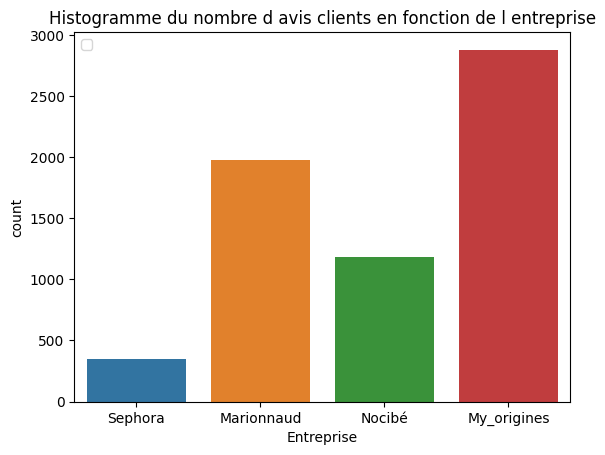

In [29]:
# Analyse de la distribution du nombre d'avis par entreprises

sns.countplot(x="company", data=df);
plt.xlabel('Entreprise')
plt.legend()
plt.title('Histogramme du nombre d avis clients en fonction de l entreprise');

# dans un 1er temps, ayant scrappé le même nombre de page (contenant le même nombre de commentaires), nous avons autant
# de données pour toutes les entreprises - nous n'avons pas nécessité de normaliser nos données

In [30]:
# autre méthodes avec un value_counts

df['company'].value_counts()


company
My_origines    2880
Marionnaud     1980
Nocibé         1180
Sephora         352
Name: count, dtype: int64

In [32]:
# les données étant beaucoup plus nombreuses pour l'entreprise My Origins, nous allons normaliser nos données
# appliquer un StandardScaler n est pas possible car ce dernier ne s'applique que sur des données numériques continues
# cela ne correspond à aucune de nos données
# pour normaliser nos données nous allons donc évaluer des pourcentages de notes par entreprises



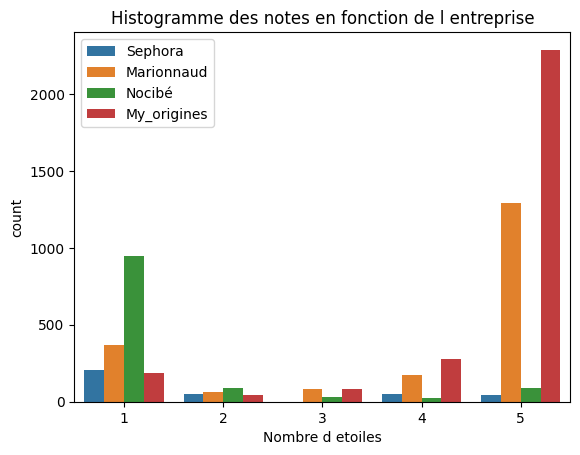

In [31]:
# Analyse de la distribution du nombre d'étoiles par entreprises

sns.countplot(x="notes", hue='company', data=df)
plt.xlabel('Nombre d etoiles')
plt.legend()
plt.title('Histogramme des notes en fonction de l entreprise');

# ce graphique nous permet de voir
# de façon générale que les clients sont extrêmes dans leurs notations et mettent soit une très bonne note (5) soit une très 
# mauvaise (1) mais il n'y a pas d'entre deux
# Sephora et Nocibé sont est assez mal nôtés, contrairement à My Origins et Marionnaud qui ont de très bonnes notes
# Il serait donc intéressant de savoir ce qui différencie ces entreprises.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


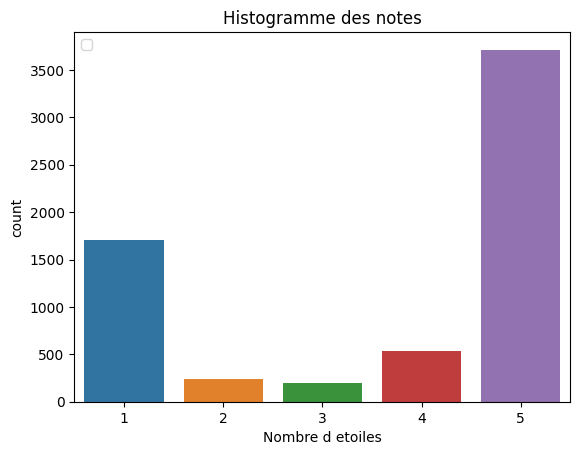

In [32]:
# Analyse de la distribution du nombre d'étoiles sans tenir compte de l entreprises

sns.countplot(x="notes", data=df)
plt.xlabel('Nombre d etoiles')
plt.legend()
plt.title('Histogramme des notes');


In [33]:
print("Le pourcentage de répartition des étoiles est de : ", df["notes"].value_counts(normalize = True)*100)

Le pourcentage de répartition des étoiles est de :  notes
5    58.088235
1    26.720901
4     8.307259
2     3.817272
3     3.066333
Name: proportion, dtype: float64


In [34]:
# Visualisation des 20 clients déposant le plus de commentaires 

top_20 = df.nlargest(20, 'nb_avis_client')
print(top_20[['company', 'client', 'nb_avis_client', 'notes']])

# on remarque qu'une cliente (Marlène Santin) est particulièrement active sur Trustpilot
# la colonne 'nb_avis_client' ne semble cependant pas pertinente. 
# en effet, si une cliente fait de nombreux achats sur un meme site et note chacune de ses commandes, son nom revient plusieurs 
# fois
# le nb_avis_client est de plus calculé sur l'ensemble du site Trustpilot et non pour l'entreprise visée 
# (ex: Nocibé dans le cas de Marlène). Nous ne poursuivrons donc pas l'analyse de cette variable.

          company              client  nb_avis_client  notes
269        Nocibé      Marlène Santin             286      5
1167       Nocibé                  Fa              85      5
274        Nocibé                Salb              79      1
909    Marionnaud            Nathalie              78      4
682        Nocibé                  CC              78      1
928   My_origines             Sabrina              78      3
1854   Marionnaud  Philippe Bouteloup              73      4
937        Nocibé              klugii              64      1
138   My_origines               Wafad              62      2
541    Marionnaud              Djamel              58      5
1426   Marionnaud               Sonia              57      5
1607  My_origines   Madame BONUCCELLI              57      5
1312   Marionnaud              Carole              55      5
465        Nocibé       Delphine Havy              55      3
991        Nocibé         Igor Reutov              55      1
154    Marionnaud       

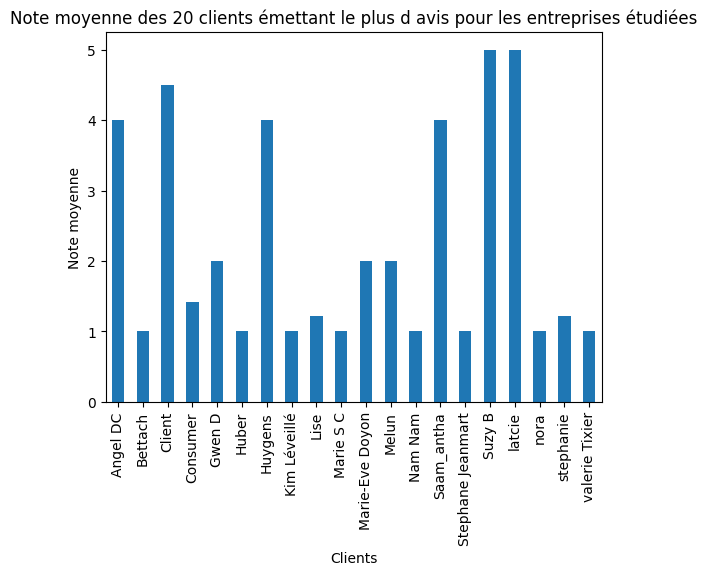

In [35]:
# nous allons cependant analyser le nom des clients revenant le plus fréquemment dans notre dataframe
# qui correspond aux clients les plus actifs (qui mettent le plus de commentaires) pour notre secteur d'étude

top_clients = df['client'].value_counts().nlargest(20)
top_clients_df = df[df['client'].isin(top_clients.index)]

moyenne_notes_top_clients = top_clients_df.groupby('client')['notes'].mean()

moyenne_notes_top_clients.plot(kind='bar')

plt.xlabel('Clients')
plt.ylabel('Note moyenne')
plt.title('Note moyenne des 20 clients émettant le plus d avis pour les entreprises étudiées')

plt.show()

# la majorité des clients qui mettent le plus de commentaires émettent de mauvaises notes (1)


"\n\nNotre 1er scrapping était réalisé sur les 20ères pages de chaque entreprise. \nSur ces 20 pages, nous obtenions des données pour sephora remontant jusqu'en 2012. \nEn revanche pour les autres entreprises (et notamment pour my origins), les données des 20ères pages étaient très récentes\nNous avons étendu notre scrapping des pages de ces sites afin de voir l'évolution des différentes variables.\nLes données de My_Origines restent malgré tout très récentes\n\nNous observons que :\n- la note moyenne mise à sephora a fortement baissé entre 2012 et 2022\n- la note moyenne mise à Nocibé semble constante entre 2016 et 2022\n- les notes moyennes de Marionnaud, My Origins et Sephora sont fortement remontées entre 2022 et 2023\n\n"

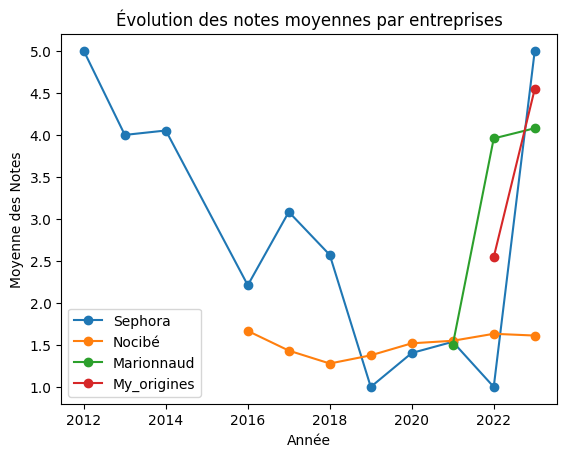

In [36]:
# évolution de la moyenne d'étoiles par an

moyennes = df.groupby(["annee_commande", "company"])["notes"].mean().reset_index()
entreprises = moyennes['company'].unique()


fig, ax = plt.subplots()

for entreprise in entreprises:
    data = moyennes[moyennes['company'] == entreprise]
    ax.plot(data['annee_commande'], data['notes'], label=entreprise, marker='o')

ax.legend()

ax.set_xlabel('Année')
ax.set_ylabel('Moyenne des Notes')
ax.set_title("Évolution des notes moyennes par entreprises");

"""

Notre 1er scrapping était réalisé sur les 20ères pages de chaque entreprise. 
Sur ces 20 pages, nous obtenions des données pour sephora remontant jusqu'en 2012. 
En revanche pour les autres entreprises (et notamment pour my origins), les données des 20ères pages étaient très récentes
Nous avons étendu notre scrapping des pages de ces sites afin de voir l'évolution des différentes variables.
Les données de My_Origines restent malgré tout très récentes

Nous observons que :
- la note moyenne mise à sephora a fortement baissé entre 2012 et 2022
- la note moyenne mise à Nocibé semble constante entre 2016 et 2022
- les notes moyennes de Marionnaud, My Origins et Sephora sont fortement remontées entre 2022 et 2023

"""


"\n\nDonnées Sephora manquantes impliquant que les années couvertes ne soient que 2021 à 2023.\nPassage des années en int ne résoud pas l'affichage.\nOn observe cependant qu'entre 2022 et 2023 :\n- que Marionnaud et My_Origins, les entreprises les mieux notées, répondent plus vite aux avis clients \n- Nocibé met plus de temps à répondre.\n\n"

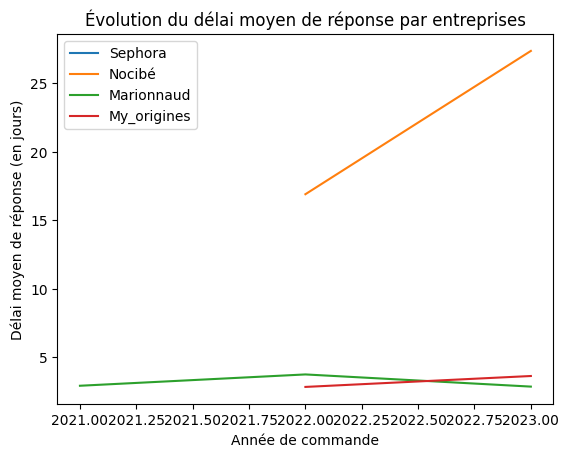

In [37]:
# On calcule l'évolution du délai moyen de réponse du sav 

df['delai_reponse'] = pd.to_timedelta(df['delai_reponse'])
df['delai_reponse'] = df['delai_reponse'].dt.total_seconds() / (24 * 3600)

moyenne_delai_par_annee = df.groupby(["annee_commande", "company"])['delai_reponse'].mean().reset_index()

entreprises = moyenne_delai_par_annee['company'].unique()

fig, ax = plt.subplots()

for entreprise in entreprises:
    data = moyenne_delai_par_annee[moyenne_delai_par_annee['company'] == entreprise]
    ax.plot(data['annee_commande'], data['delai_reponse'], label=entreprise)

ax.legend()

ax.set_xlabel('Année de commande')
ax.set_ylabel('Délai moyen de réponse (en jours)')
ax.set_title('Évolution du délai moyen de réponse par entreprises');

"""

Données Sephora manquantes impliquant que les années couvertes ne soient que 2021 à 2023.
Passage des années en int ne résoud pas l'affichage.
On observe cependant qu'entre 2022 et 2023 :
- que Marionnaud et My_Origins, les entreprises les mieux notées, répondent plus vite aux avis clients 
- Nocibé met plus de temps à répondre.

"""

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6392 entries, 0 to 2879
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   company            6392 non-null   object             
 1   client             6392 non-null   object             
 2   nb_avis_client     6392 non-null   int32              
 3   date_commande      6392 non-null   object             
 4   notes              6392 non-null   int32              
 5   titre_commentaire  6392 non-null   object             
 6   commentaire        6392 non-null   object             
 7   date_commentaire   6392 non-null   datetime64[ns, UTC]
 8   reponse_sav        2288 non-null   object             
 9   date_reponse_sav   2288 non-null   datetime64[ns, UTC]
 10  annee_commande     6392 non-null   int32              
 11  delai_reponse      2288 non-null   float64            
dtypes: datetime64[ns, UTC](2), float64(1), int32(3), obje

### 2.3 Text mining

Nous allons maintenant essayer de déterminer le sentiment général qui se dégage des commentaires. 

In [39]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [40]:
# Initialisation de la variable des mots vides

stop_words = set(stopwords.words('french'))
print(stop_words)

{'me', 'fusse', 'ont', 'serai', 'd', 'étante', 'au', 'ses', 'étant', 'auras', 'aurez', 'et', 'lui', 'sont', 'ils', 'votre', 'étaient', 'auraient', 'mes', 'mon', 'en', 'soyez', 'vous', 'auriez', 'es', 'mais', 'ayante', 'aurons', 'eûmes', 'seras', 't', 'étés', 'auront', 'eu', 'fût', 'fut', 'êtes', 'eussent', 'seront', 'par', 'ayant', 'sur', 'fussions', 'sois', 'des', 'les', 'étée', 'fûtes', 'elle', 'fusses', 'aura', 'étées', 'était', 'je', 'avaient', 'été', 'serez', 'étions', 'étantes', 'fussent', 'avons', 'aurais', 'qu', 'ou', 'm', 'fussiez', 'pour', 'eûtes', 'aies', 'fûmes', 'te', 'eût', 'ait', 'avez', 'à', 'même', 'étants', 'qui', 'aviez', 'y', 'vos', 'il', 'nous', 'dans', 'fus', 'aurait', 'j', 'ayants', 'eus', 'eussions', 'avions', 'ton', 's', 'sa', 'serait', 'seraient', 'avec', 'furent', 'soyons', 'notre', 'ne', 'eurent', 'ces', 'ayez', 'pas', 'soit', 'ce', 'aurai', 'que', 'serions', 'soient', 'aurions', 'aie', 'ma', 'eue', 'as', 'eussiez', 'de', 'serons', 'leur', 'étais', 'moi', 'a

In [41]:
# Mise à jour la valeur de stop_words 

mots = ["parfum", "produit", "Nocibé", "commande", "site", "très","plus", "c'est", "donc", "a", "car", "qu'il", "qu'elle",
        "dit", "fait", "Nocibe", "Sephora", "Marionnaud", "?", "!", ".", ",", ":", ";", "-", "--", "...",'"', "'","j'ai", "faire", "dire" ]
stop_words.update(mots)

In [42]:
# Définition de fonction renvoyant la liste des commentaires négatifs ou positifs d'une entreprise donnée 

def liste_commentaires(df, company, notes):
    commentaires_filtres = df[(df["company"]==company) & (df["notes"]== notes)]
    commentaires = commentaires_filtres["commentaire"].tolist()
    text = ''.join(commentaires)
    return text

def liste_titre_commentaire(df, company, notes):
    titre_commentaire_filtres = df[(df["company"]==company) & (df["notes"]== notes)]
    titre_commentaires = titre_commentaire_filtres["titre_commentaire"].tolist()
    text = ''.join(titre_commentaires)
    return text

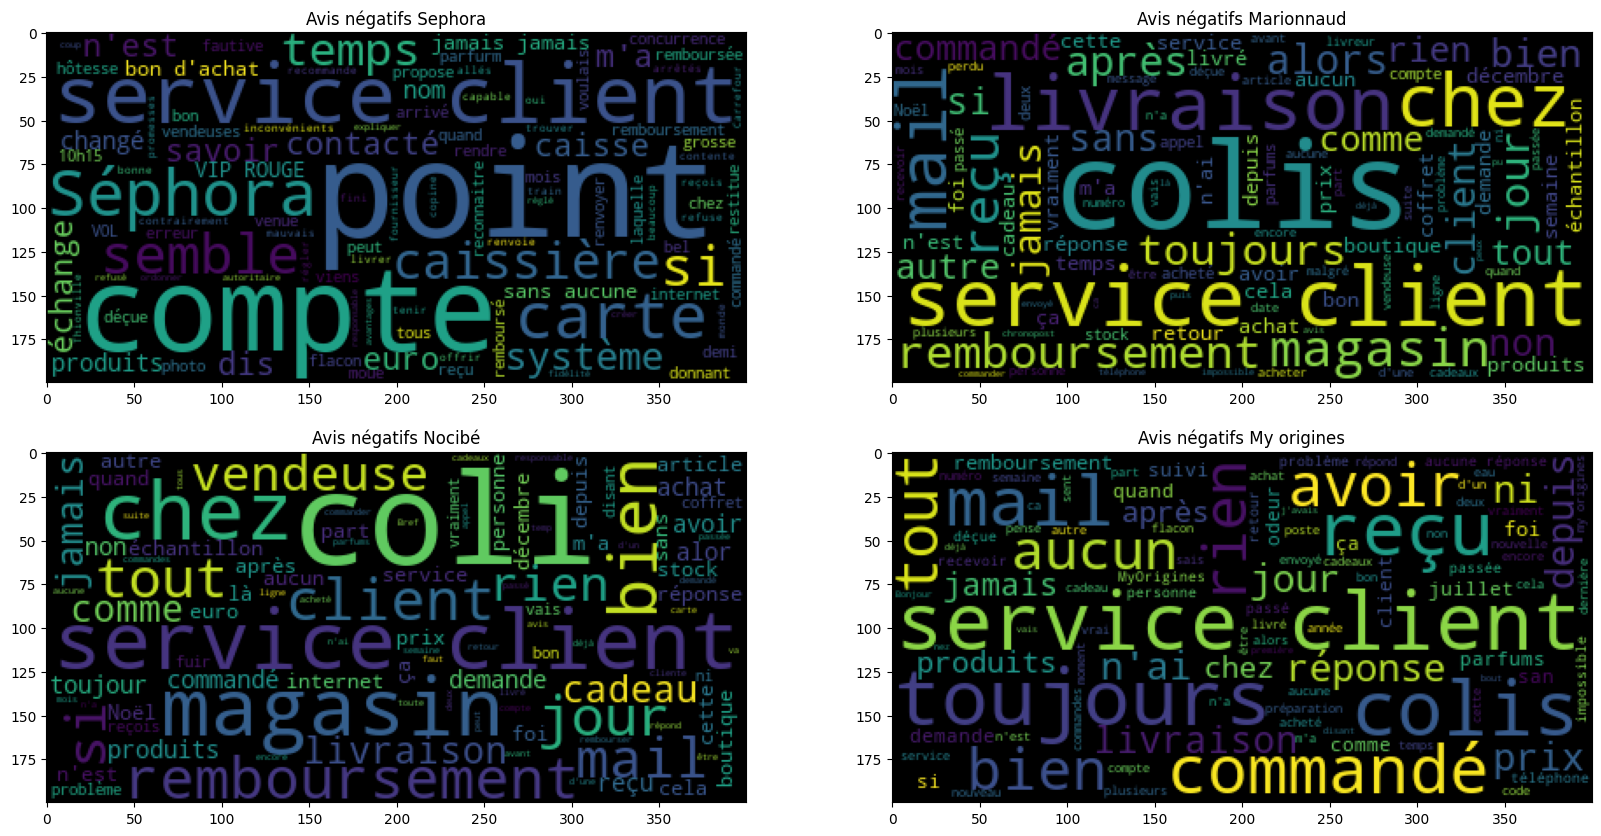

In [43]:
# Définition des wordcloud négatifs (notes égales à 1) de chacune des entreprises 

wc = WordCloud(background_color = "black", max_words = 100, stopwords = stop_words)
plt.figure(figsize=(20,10))

plt.subplot(221)
wc.generate(liste_commentaires(df, "Sephora", 1))
plt.title("Avis négatifs Sephora")
plt.imshow(wc)

plt.subplot(222)
wc.generate(liste_commentaires(df, "Marionnaud", 1))
plt.title("Avis négatifs Marionnaud")
plt.imshow(wc)

plt.subplot(223)
wc.generate(liste_commentaires(df, "Nocibé", 1))
plt.title("Avis négatifs Nocibé")
plt.imshow(wc)

plt.subplot(224)
wc.generate(liste_commentaires(df, "My_origines", 1))
plt.title("Avis négatifs My origines")
plt.imshow(wc);

Le mot "service client" revient souvent dans les commentaires négatifs. 
A chaque réclamation, le service client est sollicité. Il est donc compliqué de savoir si le service client a été sollicité
pour le problème en question ou si le service client est défaillant. 

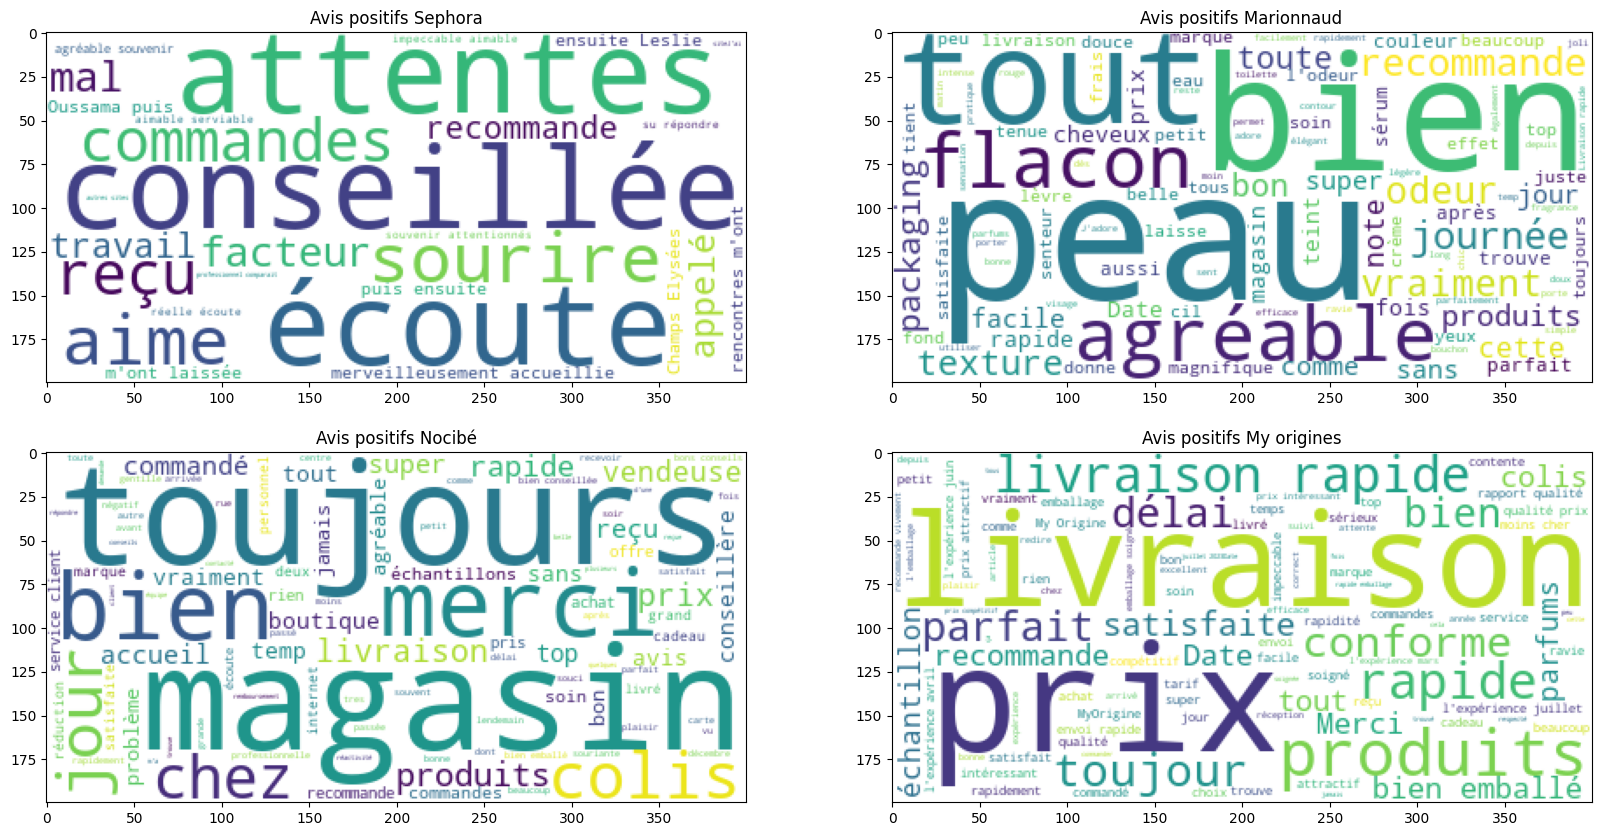

In [44]:
# Définition des wordcloud positifs (notes égales à 5) de chacune des entreprises 

wc = WordCloud(background_color = "white", max_words = 100, stopwords = stop_words)
plt.figure(figsize=(20,10))

plt.subplot(221)
wc.generate(liste_commentaires(df, "Sephora", 5))
plt.title("Avis positifs Sephora")
plt.imshow(wc)

plt.subplot(222)
wc.generate(liste_commentaires(df, "Marionnaud", 5))
plt.title("Avis positifs Marionnaud")
plt.imshow(wc)

plt.subplot(223)
wc.generate(liste_commentaires(df, "Nocibé", 5))
plt.title("Avis positifs Nocibé")
plt.imshow(wc)

plt.subplot(224)
wc.generate(liste_commentaires(df, "My_origines", 5))
plt.title("Avis positifs My origines")
plt.imshow(wc);

Contrairement aux avis négatifs, aucun point commun ne semble se dégager pour les commentaires positifs
* Pour Séphora - les vendeur/euses, leurs conseils, leurs attitudes semblent être appréciés
* Pour Marionnaud - le packaging, les flacons, la qualité des produits est mise en avant
* Pour Nocibé - aucun champ lexical ciblé ne ressort du wordcloud
* Pour My Origines (site de vente en ligne uniquement) - la rapidité, la conformité des produits, la livraison semblent satisfaire les clients

In [45]:
# Séparer df en catégories : très mauvais, mauvais, moyen, bon, très bon

df_Tmauvais = df[df.notes == 1]
df_mauvais = df[df.notes == 2]
df_moyen = df[df.notes == 3]
df_bon = df[df.notes == 4]
df_Tbon = df[df.notes == 5]

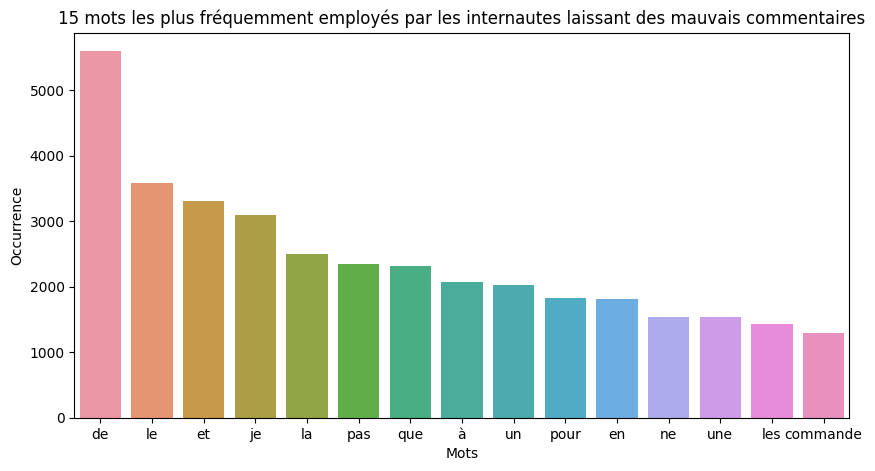

In [46]:
from collections import Counter
import seaborn as sns 

chaine = ' '.join(i.lower() for i in df_Tmauvais.commentaire if i.lower() not in stop_words)
dico = Counter(chaine.split())

mots = [m[0] for m in dico.most_common(15)]
freq = [m[1] for m in dico.most_common(15)]

plt.figure(figsize= (10,5))
sns.barplot(x=mots, y=freq)
plt.title('15 mots les plus fréquemment employés par les internautes laissant des mauvais commentaires') 
plt.xlabel('Mots')
plt.ylabel('Occurrence')
plt.show()

In [47]:
mots_vides = ["de","et","le","je","la","que","à","pour","un","les","me","en","au",'tous',"avant","lorsque",
              "pas", "je", "en", "la", "a", "(", ")", "à", "que", "un", "pour", "ne", "les", "une", "sur", "j'ai", "très", "plus",
              ".", ",", "!", "'", ":", "...", "`",'mais', 'certains',  'suis',  'quand','dans','sont','leur','comme','faut','vous','leur' 'chez', 'pour']
stop_words.update(mots_vides)

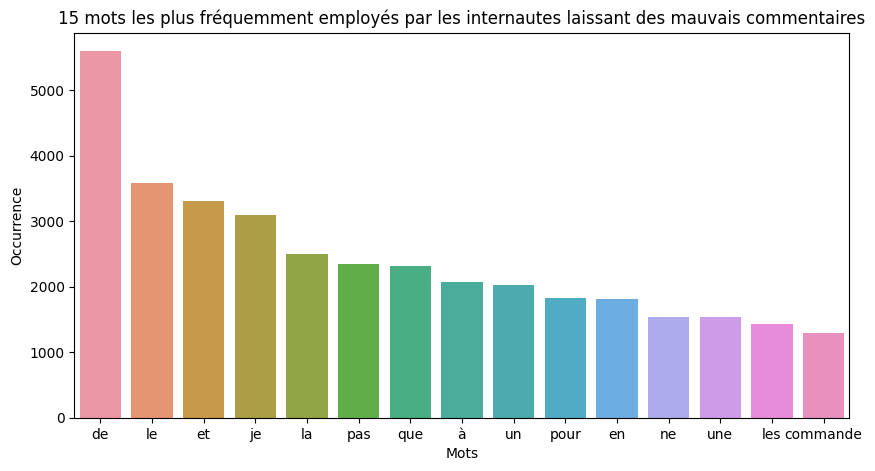

In [48]:
chaine = ' '.join(i.lower() for i in df_Tmauvais.commentaire if i.lower() not in stop_words)
dico = Counter(chaine.split())

mots = [m[0] for m in dico.most_common(15)]
freq = [m[1] for m in dico.most_common(15)]

plt.figure(figsize= (10,5))
sns.barplot(x=mots, y=freq)
plt.title('15 mots les plus fréquemment employés par les internautes laissant des mauvais commentaires') 
plt.xlabel('Mots')
plt.ylabel('Occurrence')
plt.show()

# renvoie un graph identique sans prise en compte du stop_words 

## 3. Modélisation et définition d'algorithmes 

L'objectif est désormais de construire un modèle simple de Machine Learning pour prédire une note à partir de commentaires.

* Variable explicative: commentaires
* Variable à prédire : notes

Nous essaierons plusieurs algorithmes. 

### 3.1 Gradient Boosting Classifier

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# On ne garde de notre dataframe que les commentaires (variable explicative) et les notes (variable à prédire)
X, y = df.commentaire, df.notes

# Séparation des données d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Définition de l'objet CountVectorizer() et du GradientBoostingClassifier()
vectorizer = CountVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


In [50]:
clf_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)

# Prédiction sur les valeurs test
y_pred_gb = clf_gb.predict(X_test)


In [51]:
from sklearn.metrics import classification_report

# Calcul et affichage de classification_report
print( classification_report(y_test, y_pred_gb) )


              precision    recall  f1-score   support

           1       0.75      0.84      0.79       348
           2       0.88      0.13      0.23        52
           3       0.00      0.00      0.00        43
           4       0.62      0.21      0.31       101
           5       0.83      0.95      0.88       735

    accuracy                           0.79      1279
   macro avg       0.61      0.43      0.44      1279
weighted avg       0.76      0.79      0.76      1279



In [52]:
# Calcul et affichage de la matrice de confusion
confusion_matrix = pd.crosstab(y_test, y_pred_gb, rownames=['Classe réelle'], colnames=['Classe prédite'])
print(confusion_matrix)

"""
Les notes extrêmes semblent être mieux prédites que les notes intermédiaires : 2, 3, 4.

"""

Classe prédite    1  2  3   4    5
Classe réelle                     
1               293  1  1   3   50
2                29  7  2   4   10
3                22  0  0   1   20
4                15  0  0  21   65
5                34  0  1   5  695


'\nLes notes extrêmes semblent être mieux prédites que les notes intermédiaires : 2, 3, 4.\n\n'

In [53]:
# Essai sur quelque avis 

avis = ["Nocibé est une mauvaise marque; les produits ne sont pas qualitatifs", 
        "J'apprécie beaucoup my origins. Bien que le site soit en ligne, ils sont très réactifs."]

tokenized_comments = vectorizer.transform(avis)

clf_gb.predict(tokenized_comments.toarray())

array([1, 5])

### 3.2 Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_jobs=-1, random_state=321).fit(X_train, y_train)

# Prédiction sur les valeurs test
y_pred_rf = clf_rf.predict(X_test)


In [55]:
# Calcul et affichage de classification_report
print( classification_report(y_test, y_pred_rf) )

              precision    recall  f1-score   support

           1       0.80      0.87      0.83       348
           2       1.00      0.27      0.42        52
           3       0.00      0.00      0.00        43
           4       0.87      0.13      0.22       101
           5       0.82      0.97      0.89       735

    accuracy                           0.81      1279
   macro avg       0.70      0.45      0.47      1279
weighted avg       0.80      0.81      0.77      1279



In [56]:
# Calcul et affichage de la matrice de confusion
confusion_matrix = pd.crosstab(y_test, y_pred_rf, rownames=['Classe réelle'], colnames=['Classe prédite'])
print(confusion_matrix)

"""
Le constat est identique sur les notes intermédiaires : 2, 3, 4.

"""

Classe prédite    1   2   4    5
Classe réelle                   
1               303   0   0   45
2                25  14   0   13
3                20   0   1   22
4                 8   0  13   80
5                23   0   1  711


'\nLe constat est identique sur les notes intermédiaires : 2, 3, 4.\n\n'

In [57]:
# Essai sur quelque avis 

avis = ["Je suis mécontente par le service proposé par My Origins.", "En revanche, je trouve les produits Sephora très qualitatifs."]

tokenized_comments = vectorizer.transform(avis)

clf_rf.predict(tokenized_comments.toarray())

array([5, 5])

### 3.3 KNN

In [58]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV

knn = neighbors.KNeighborsClassifier()
params_knn={"n_neighbors" : range(2,41)}

# Recherche des meilleurs hyperparamètres
grid_knn=GridSearchCV(estimator = knn, param_grid = params_knn, cv=5)
grid_knn.fit(X_train, y_train)
print( grid_knn.best_params_) # a voir avec margaux : entrainer le modele avec les best params puis continuer avec pred

{'n_neighbors': 8}


In [60]:
# Prédiction sur les valeurs test
y_pred_knn = grid_knn.predict(X_test)

# Calcul et affichage de la matrice de confusion
print(pd.crosstab(y_test, y_pred_knn))

col_0    1   2   4    5
notes                  
1      175   0   7  166
2       11  14   0   27
3        8   0   2   33
4        5   0  13   83
5        5   0   3  727


In [61]:
# Calcul et affichage de classification_report
print( classification_report(y_test, y_pred_knn) )

              precision    recall  f1-score   support

           1       0.86      0.50      0.63       348
           2       1.00      0.27      0.42        52
           3       0.00      0.00      0.00        43
           4       0.52      0.13      0.21       101
           5       0.70      0.99      0.82       735

    accuracy                           0.73      1279
   macro avg       0.62      0.38      0.42      1279
weighted avg       0.72      0.73      0.68      1279



In [62]:
# Essai sur quelque avis 
avis = ["Je suis mécontente par le service proposé par My Origins.", "En revanche, je trouve les produits Sephora très qualitatifs."]
tokenized_comments = vectorizer.transform(avis)
grid_knn.predict(tokenized_comments.toarray())

array([5, 5])

## 3.4 SVC

In [ ]:
from sklearn.svm import SVC
svc = SVC()

# Recherche des meilleurs hyperparamètres
params_svc = {"kernel":["linear","sigmoid","rbf"], "C" : [0.1, 1, 10, 30]}
grid_svc=GridSearchCV(estimator = svc, param_grid = params_svc, cv=5)
grid_svc.fit(X_train, y_train)
print( grid_svc.best_params_) # a voir avec margaux : entrainer le modele avec les best params puis continuer avec pred

In [ ]:
# Prédiction sur les valeurs test
y_pred_svc = grid_svc.predict(X_test)
print(pd.crosstab(y_test, y_pred_svc))

In [ ]:
# Calcul et affichage de classification_report
print( classification_report(y_test, y_pred_svc) )

In [ ]:
# Essai sur quelque avis 
tokenized_comments = vectorizer.transform(avis)
grid_svc.predict(tokenized_comments.toarray())

## 3.5 Voting Classifier et Stacking Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier, StackingClassifier

clf1 = neighbors.KNeighborsClassifier(n_neighbors= 3)
clf2 = SVC(random_state = 27)
clf3 = RandomForestClassifier( random_state = 27)
clf4 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

In [ ]:
vclf = VotingClassifier(estimators=[('knn', clf1), ('svc', clf2), ('rf', clf3), ("gbc", clf4)], voting='hard')
sclf = StackingClassifier(estimators=[('knn', clf1), ('svc', clf2), ('rf', clf3), ("gbc", clf4)], final_estimator=clf3)

In [ ]:
vclf.fit(X_train, y_train)
sclf.fit(X_train, y_train)

In [ ]:
# Prédiction sur les valeurs test
y_pred_vclf = vclf.predict(X_test)
y_pred_sclf = sclf.predict(X_test)
print(pd.crosstab(y_test, y_pred_vclf))
print(pd.crosstab(y_test, y_pred_sclf))

In [ ]:
# Calcul et affichage de classification_report
print( classification_report(y_test, y_pred_vclf) )
print( classification_report(y_test, y_pred_sclf) )

In [ ]:
# Essai sur quelque avis 
avis = ["Nocibé est une mauvaise marque; les produits ne sont pas qualitatifs",
        "J'apprécie beaucoup my origins. Bien que le site soit en ligne, ils sont très réactifs."]

tokenized_comments = vectorizer.transform(avis)

print(vclf.predict(tokenized_comments.toarray()))
print(sclf.predict(tokenized_comments.toarray()))

## 4. Conclusion de la performance des modèles